<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/Mod%C3%A8les_de_statistiques_Moindres_carr%C3%A9s_ordinaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moindres carrés ordinaires

In [1]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [7]:
np.random.seed(9876789)

# Estimation MCO
Données artificielles :

In [8]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

# Notre modèle a besoin d'une interception donc nous ajoutons une colonne de 1 :

In [9]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

# Ajustement et résumé :

In [10]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          2.83e-239
Time:                        10:10:09   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

Les quantités d'intérêt peuvent être extraites directement du modèle ajusté. Tapez dir(results)pour une liste complète. Voici quelques exemples:

In [11]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


# Courbe OLS non linéaire mais linéaire en paramètres
Nous simulons des données artificielles avec une relation non linéaire entre x et y :

In [12]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

# Ajustement et résumé :

In [13]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           6.30e-27
Time:                        10:11:53   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

# Extraire d'autres quantités d'intérêt :

In [14]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


Dessinez un graphique pour comparer la véritable relation avec les prédictions OLS. Les intervalles de confiance autour des prédictions sont construits à l'aide de la wls_prediction_stdcommande.

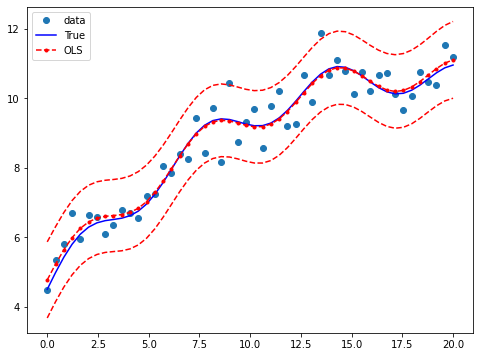

In [15]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

# MCO avec variables fictives
Nous générons des données artificielles. Il y a 3 groupes qui seront modélisés à l'aide de variables fictives. Le groupe 0 est la catégorie omise/de référence.

In [16]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1.0, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

# Inspectez les données :

In [17]:
print(X[:5, :])
print(y[:5])
print(groups)
print(dummy[:5, :])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.28223335 10.50481865 11.84389206 10.38508408 12.37941998]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


# Ajustement et résumé :

In [18]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           5.69e-38
Time:                        10:14:52   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

# Remarques:
[1] Les erreurs standard supposent que la matrice de covariance des erreurs est correctement spécifiée.
Dessinez un graphique pour comparer la véritable relation avec les prédictions OLS :

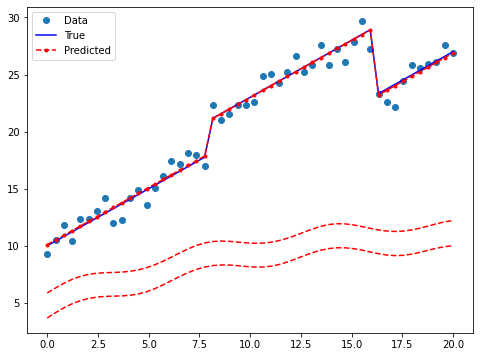

In [19]:
pred_ols2 = res2.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res2.fittedvalues, "r--.", label="Predicted")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
legend = ax.legend(loc="best")

# test F
Nous voulons tester l'hypothèse que les deux coefficients sur les variables indicatrices sont égaux à zéro, c'est-à-dire Rxb=0.
. Un test F nous conduit à rejeter fortement l'hypothèse nulle de constante identique dans les 3 groupes :

In [20]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[145.49268198]]), p=1.2834419617281953e-20, df_denom=46, df_num=2>


Vous pouvez également utiliser une syntaxe de type formule pour tester des hypothèses

In [21]:
print(res2.f_test("x2 = x3 = 0"))

<F test: F=array([[145.49268198]]), p=1.2834419617282074e-20, df_denom=46, df_num=2>


# Effets de petit groupe
Si nous générons des données artificielles avec des effets de groupe plus petits, le test T ne peut plus rejeter l'hypothèse nulle :

In [22]:
beta = [1.0, 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()

In [23]:
print(res3.f_test(R))

<F test: F=array([[1.22491119]]), p=0.3031864410631272, df_denom=46, df_num=2>


In [24]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=array([[1.22491119]]), p=0.30318644106312803, df_denom=46, df_num=2>


# Multicolinéarité
Le jeu de données de Longley est bien connu pour avoir une multicolinéarité élevée. Autrement dit, les prédicteurs exogènes sont fortement corrélés. Ceci est problématique car cela peut affecter la stabilité de nos estimations de coefficients lorsque nous apportons des modifications mineures à la spécification du modèle.

In [25]:
from statsmodels.datasets.longley import load_pandas

y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Ajustement et résumé :

In [26]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.98e-10
Time:                        10:21:56   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Numéro d'état
Une façon d'évaluer la multicolinéarité consiste à calculer le nombre de conditions. Les valeurs supérieures à 20 sont inquiétantes (voir Greene 4.9). La première étape consiste à normaliser les variables indépendantes pour avoir une longueur unitaire :

In [27]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:, i] = X[name] / np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T, norm_x)

Ensuite, nous prenons la racine carrée du rapport de la plus grande à la plus petite valeur propre

In [28]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87037739987


# Suppression d'une observation
Greene souligne également que l'abandon d'une seule observation peut avoir un effet dramatique sur les estimations des coefficients :

In [29]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print(
    "Percentage change %4.2f%%\n"
    * 7
    % tuple(
        [
            i
            for i in (ols_results2.params - ols_results.params)
            / ols_results.params
            * 100
        ]
    )
)

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



Nous pouvons également consulter des statistiques formelles pour cela, telles que le DFBETAS - une mesure standardisée de la variation de chaque coefficient lorsque cette observation est omise.

In [30]:
infl = ols_results.get_influence()

En général on peut considérer DBETAS en valeur absolue supérieure à
être des observations influentes

In [31]:
2.0 / len(X) ** 0.5

0.5

In [32]:
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL       dfb_GNP     dfb_UNEMP     dfb_ARMED  \
0   -0.016406  -169.822675  1.673981e+06  54490.318088  51447.824036   
1   -0.020608  -187.251727  1.829990e+06  54495.312977  52659.808664   
2   -0.008382   -65.417834  1.587601e+06  52002.330476  49078.352378   
3    0.018093   288.503914  1.155359e+06  56211.331922  60350.723082   
4    1.871260  -171.109595  4.498197e+06  82532.785818  71034.429294   
5   -0.321373  -104.123822  1.398891e+06  52559.760056  47486.527649   
6    0.315945  -169.413317  2.364827e+06  59754.651394  50371.817827   
7    0.015816   -69.343793  1.641243e+06  51849.056936  48628.749338   
8   -0.004019   -86.903523  1.649443e+06  52023.265116  49114.178265   
9   -1.018242  -201.315802  1.371257e+06  56432.027292  53997.742487   
10   0.030947   -78.359439  1.658753e+06  52254.848135  49341.055289   
11   0.005987  -100.926843  1.662425e+06  51744.606934  48968.560299   
12  -0.135883   -32.093127  1.245487e+06  50203.467593  51148.37

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:733: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:762: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))
